

# **Análisis Exploratorio de Datos (EDA) para el Dataset users**

El Análisis Exploratorio de Datos (EDA) es el proceso de explorar y comprender los datos antes de realizar análisis más avanzados. En este Jupyter notebook, realizaremos un EDA para los conjuntos de datos relacionados con Yelp, con el objetivo de identificar problemas potenciales y comprender mejor la estructura de los datos. A continuación se describen los pasos que seguiremos:

---

### **1. Exploración Inicial**
- **1.1. Carga del Archivo**: Cargaremos cada archivo en un DataFrame de pandas.
- **1.2. Dimensiones del DataFrame**: Determinaremos cuántas filas y columnas tiene cada DataFrame.
- **1.3. Tipos de Datos**: Revisaremos los tipos de datos para cada columna.
- **1.4. Muestra Rápida**: Observaremos las primeras y últimas filas para tener una idea general del contenido del DataFrame.



### **2. Análisis de Datos Cualitativos**
- **2.1. Valores Nulos**: Identificaremos columnas con valores faltantes y cuántos valores nulos hay.
- **2.2. Estadísticas Básicas**: Utilizaremos `describe()` para obtener estadísticas como media, mediana, desviación estándar, etc.
- **2.3. Valores Únicos**: Contaremos cuántos valores únicos hay en cada columna para entender su diversidad.



### **3. Análisis de Datos Cuantitativos**
- **3.1. Distribuciones**: Crearemos histogramas para visualizar la distribución de las columnas numéricas.
- **3.2. Correlaciones**: Analizaremos las correlaciones entre columnas numéricas para encontrar relaciones significativas.
- **3.3. Detección de Outliers**: Usaremos gráficos como boxplots para detectar valores atípicos.



### **4. Análisis de Datos Categóricos**
- **4.1. Distribución de Categorías**: Verificaremos la frecuencia de las categorías para entender su diversidad.
- **4.2. Relaciones entre Categorías**: Usaremos gráficos de barras para ver cómo se relacionan las categorías con otras variables.



### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.

---

Al final de este EDA, esperamos tener una comprensión clara de nuestros datos, permitiéndonos planificar y ejecutar análisis más avanzados. Este proceso establecerá una base sólida para el resto del proyecto y asegurará que estamos trabajando con datos limpios y consistentes.

---


**IMPORTAMOS LIBRERIAS**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **1. Exploración Inicial**

In [3]:
#Ruta del archivo Parquet
ruta_users_parquet = r'D:\Yelp\raw_data_parquet\Users\user-002_chunk_1.parquet'

# Cargar el archivo Parquet en un DataFrame
df_users = pd.read_parquet(ruta_users_parquet)


In [4]:
# Dimensiones
print("Dimensiones:", df_users.shape)

Dimensiones: (1000000, 22)


Por algun motivo al momento de cargar el archivo business.pkl las columnas se estan duplicando.. en total deberian ser solo 14 columnas 

In [5]:
# Mostrar todas las columnas para verificar duplicados
print("Columnas del DataFrame:", df_users.columns)

# Identificar columnas duplicadas
columnas_duplicadas = df_users.columns[df_users.columns.duplicated()].unique()

print("Columnas duplicadas:", columnas_duplicadas)

Columnas del DataFrame: Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')
Columnas duplicadas: Index([], dtype='object')


In [8]:
# Eliminar columnas duplicadas (manteniendo solo la primera aparición)
users_unique = df_users.loc[:, ~df_users.columns.duplicated()]

# Reasignar el DataFrame para mayor claridad
df_users = users_unique

# Verificar las columnas únicas
print("Columnas después de eliminar duplicados:", df_users.columns)


Columnas después de eliminar duplicados: Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')


In [10]:
# Vista Previa

# Dimensiones
print("Dimensiones:", df_users.shape)

df_users.head(3)



Dimensiones: (1000000, 22)


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,fbYIDgRxm5s6gqndZBd8VA,Allison,35,2009-10-07 23:02:25,29,3,10,,"hLSxHbq2uuSGC7pMaPVcXw, LMsLF2Y1-wcU6jKk6oOZ8Q...",3,...,0,0,0,0,0,1,1,1,1,0
1,vdBqmss5ugQwp6WMCiyU7A,Brad,5,2011-05-11 14:20:37,0,0,0,,"oAW8iOHb6iEdrjW5CcZD6Q, 8W6QgX67Zf-h_3en4UPNpQ...",0,...,0,0,0,0,0,0,0,0,0,0
2,QNB9I0Bo9K14237ao4yrpA,Tyler,2,2011-09-25 02:56:14,1,0,0,,"Sb139v26otiveywG0UtDMQ, a-cVe782K7GwYcMpDNat3g...",0,...,0,0,0,0,0,0,1,1,0,0


Tomamos una muestra aleatoria para optimizar tiempos de procesamiento

In [11]:
# Tomar una muestra aleatoria del DataFrame
users_sample = df_users.sample(frac=0.1, random_state=42)  # 10% del DataFrame

# Dimensiones de la muestra
print("Dimensiones de la muestra:", users_sample.shape)

Dimensiones de la muestra: (100000, 22)


In [12]:
# Tipos de datos
print("Tipos de datos:", users_sample.dtypes)

Tipos de datos: user_id                object
name                   object
review_count            int64
yelping_since          object
useful                  int64
funny                   int64
cool                    int64
elite                  object
friends                object
fans                    int64
average_stars         float64
compliment_hot          int64
compliment_more         int64
compliment_profile      int64
compliment_cute         int64
compliment_list         int64
compliment_note         int64
compliment_plain        int64
compliment_cool         int64
compliment_funny        int64
compliment_writer       int64
compliment_photos       int64
dtype: object


In [18]:
users_sample.head(2)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
987231,ptwLY1_8Iuq4qaU2CXC7aQ,Tessa,1,2010-11-12 01:11:54,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
79954,HLR-qqmM1GPoPOB-_0KbdQ,Frankie,3,2016-09-25 16:25:27,1,0,1,,"oiOBPPcTDoKHQ2iqk0OAPQ, Qy-9efzSwfz359akKBxWPw...",0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
users_sample['name'] = users_sample['name'].astype('category')
users_sample['yelping_since']=pd.to_datetime(users_sample['yelping_since'])
users_sample['friends'] = users_sample['friends'].astype('str') 

In [23]:
# Tipos de datos
print("Tipos de datos:", users_sample.dtypes)

Tipos de datos: user_id                       object
name                        category
review_count                   int64
yelping_since         datetime64[ns]
useful                         int64
funny                          int64
cool                           int64
elite                         object
friends                       object
fans                           int64
average_stars                float64
compliment_hot                 int64
compliment_more                int64
compliment_profile             int64
compliment_cute                int64
compliment_list                int64
compliment_note                int64
compliment_plain               int64
compliment_cool                int64
compliment_funny               int64
compliment_writer              int64
compliment_photos              int64
dtype: object


In [26]:
# Muestra las primeras filas
users_sample.head(3)

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
987231,ptwLY1_8Iuq4qaU2CXC7aQ,Tessa,1,2010-11-12 01:11:54,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
79954,HLR-qqmM1GPoPOB-_0KbdQ,Frankie,3,2016-09-25 16:25:27,1,0,1,,"oiOBPPcTDoKHQ2iqk0OAPQ, Qy-9efzSwfz359akKBxWPw...",0,...,0,0,0,0,0,0,0,0,0,0
567130,3ldX1J68fmMxuSFicBAtKA,Lori,2,2019-04-03 06:31:41,2,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0


### **2. Análisis de Datos Cualitativos**

In [27]:
# Conteo de valores nulos
users_sample.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [28]:
# Estadísticas básicas
users_sample.describe(include='all')

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,100000,100000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99992,16021,NaN,NaN,NaN,NaN,NaN,256,51877,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dr2Uiv9mn6MgUNT9rcoASg,John,NaN,NaN,NaN,NaN,NaN,,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,983,NaN,NaN,NaN,NaN,NaN,97119,47976,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.913120,2015-01-12 11:08:56.573170176,30.612320,12.857640,17.010070,NaN,NaN,1.032120,...,0.207720,0.117430,0.089770,0.040450,0.969350,2.07479,2.167620,2.167620,0.832050,0.899710
min,NaN,NaN,0.000000,2004-10-12 08:51:07,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,2.000000,2012-09-24 14:59:32.500000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,4.000000,2015-02-04 23:00:03.500000,2.000000,0.000000,0.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,11.000000,2017-04-04 16:44:23.249999872,8.000000,2.000000,2.000000,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,NaN,NaN,6766.000000,2022-01-19 16:18:56,124311.000000,91842.000000,113069.000000,NaN,NaN,1563.000000,...,833.000000,936.000000,596.000000,327.000000,5112.000000,15322.00000,20835.000000,20835.000000,6574.000000,16333.000000


### **3. Análisis de Datos Cuantitativos**

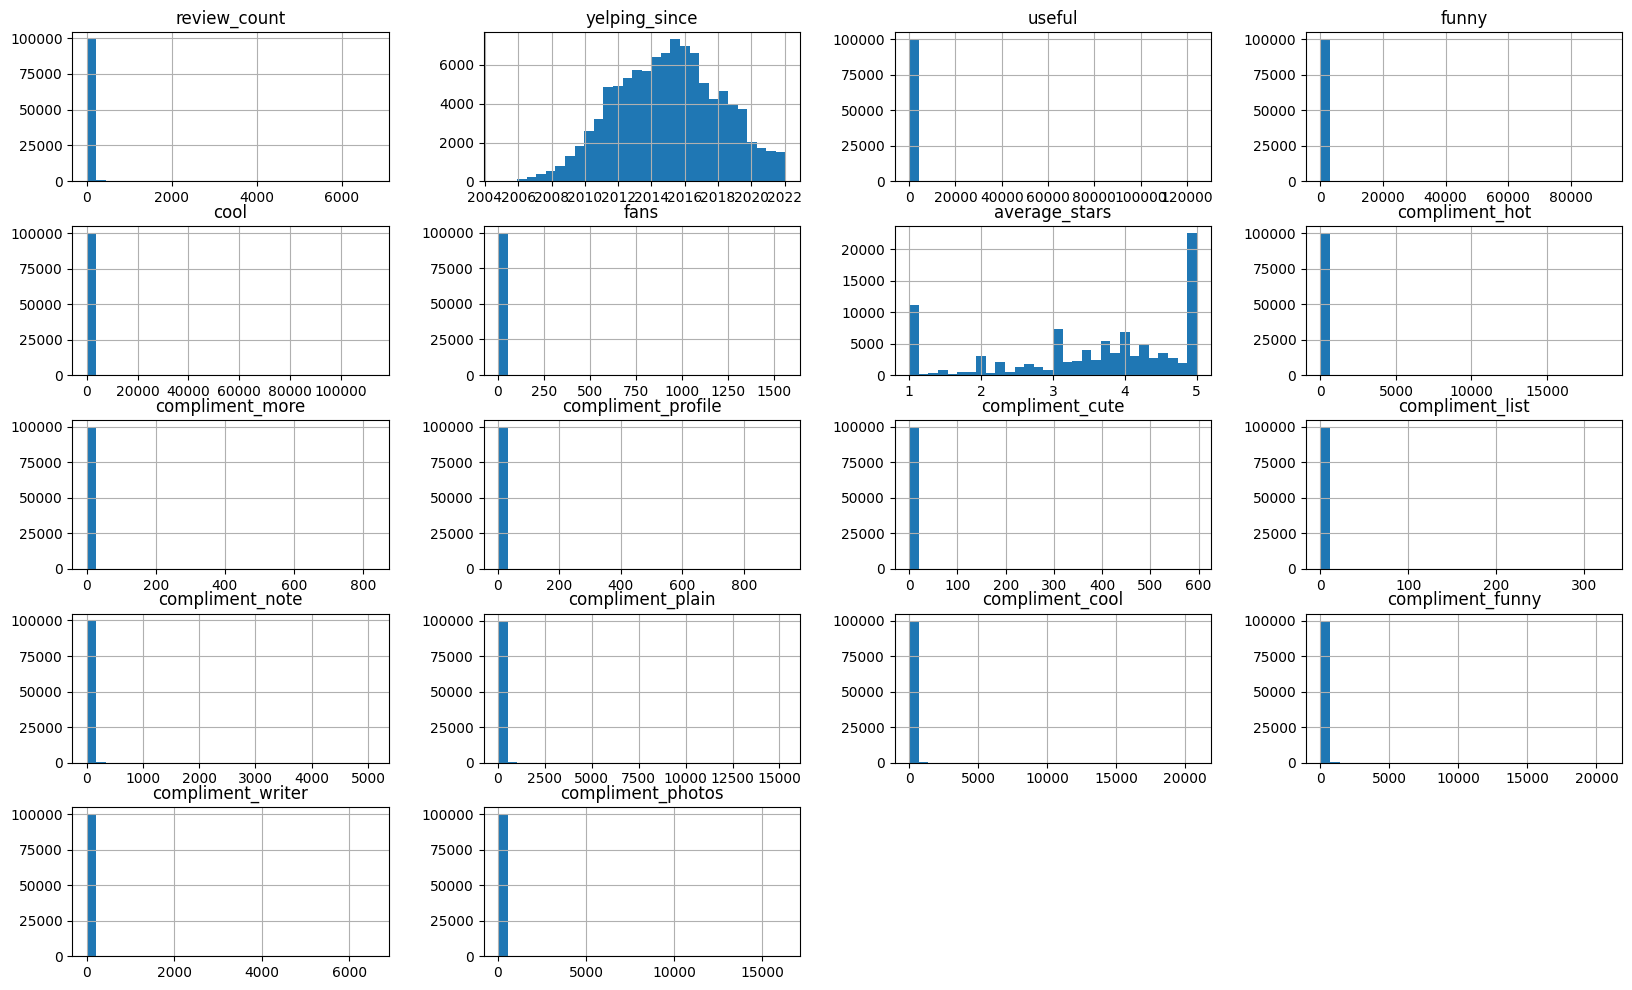

<Figure size 640x480 with 0 Axes>

In [37]:
### 3. Análisis de Datos Cuantitativos

# Distribuciones 
# Histogramas
users_sample.hist(bins=30, figsize=(20, 12))
plt.show()
plt.tight_layout()


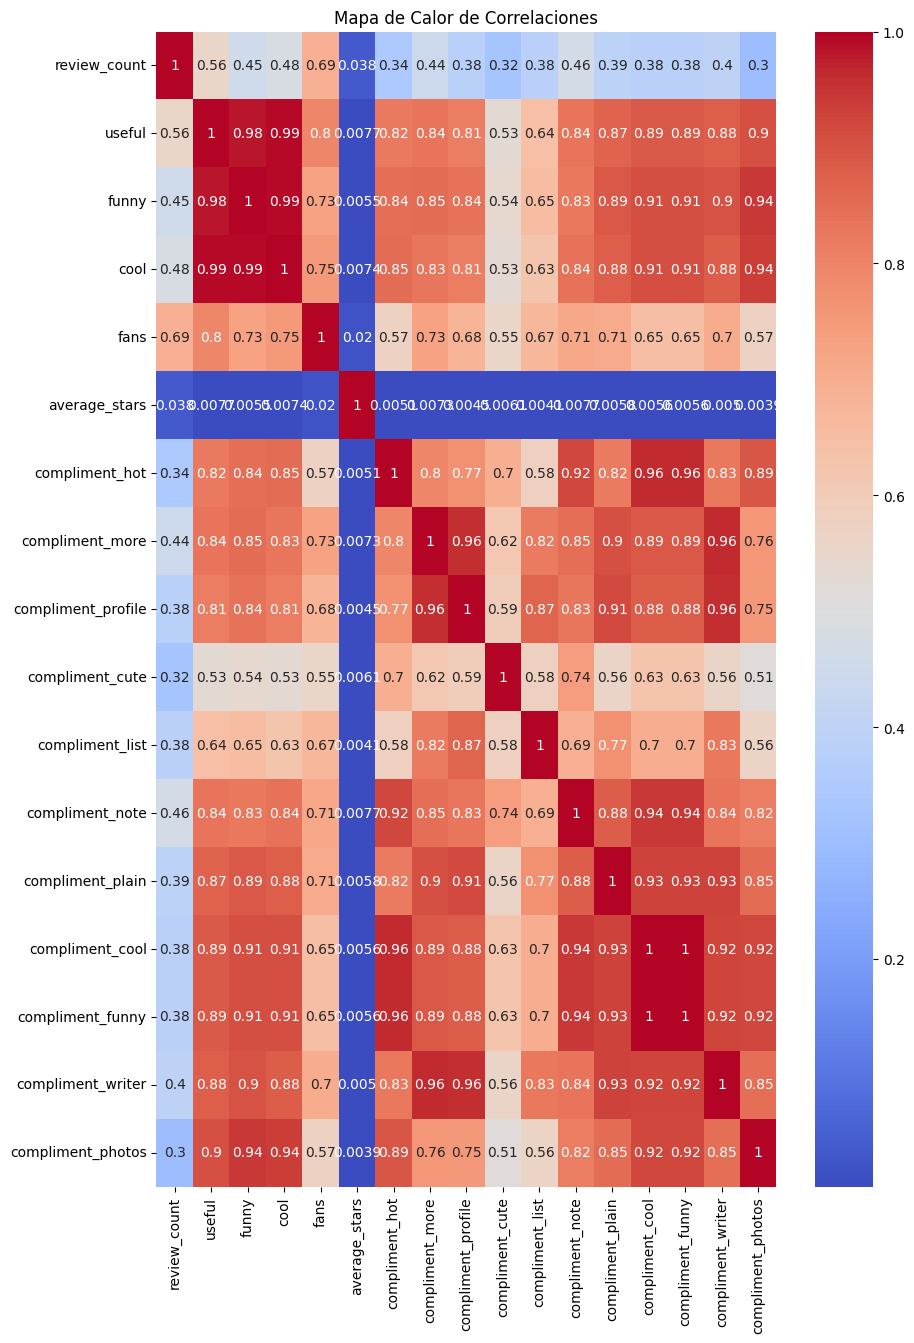

In [36]:
# Correlaciones 

# Seleccionamos solo las columnas numéricas
columnas_numericas = users_sample.select_dtypes(include=['number', 'float64', 'int64']).columns

# Calcular correlaciones solo con las columnas numéricas
correlaciones = users_sample[columnas_numericas].corr()

# Crear un mapa de calor para las correlaciones
import seaborn as sns
import matplotlib.pyplot as plt


# Ajustar el tamaño del gráfico
plt.figure(figsize=(10, 15))

sns.heatmap(correlaciones, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()


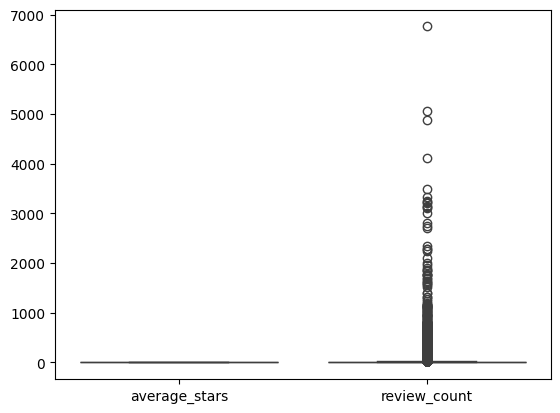

In [39]:
# Boxplots para outliers
sns.boxplot(data=users_sample[['average_stars', 'review_count']])
plt.show()

### **4. Análisis de Datos Categóricos**

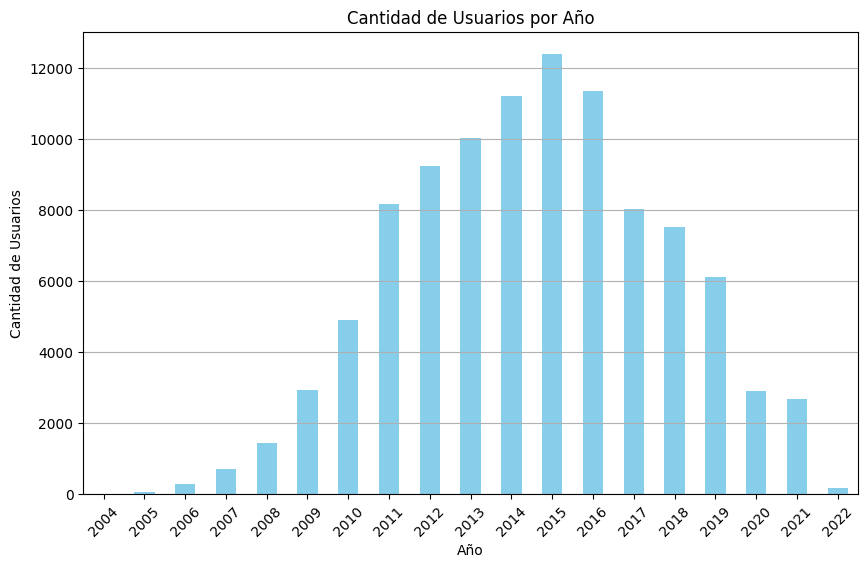

In [41]:
# Obtener el año de cada fecha
users_sample['año'] = users_sample['yelping_since'].dt.year

# Contar la cantidad de datos por año
conteo_por_año = users_sample['año'].value_counts().sort_index()

# Graficar la cantidad de datos por año
conteo_por_año.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Año')
plt.ylabel('Cantidad de Usuarios')
plt.title('Cantidad de Usuarios por Año')
plt.xticks(rotation=45)  # Rotar los años en el eje x para una mejor visualización
plt.grid(axis='y')
plt.show()

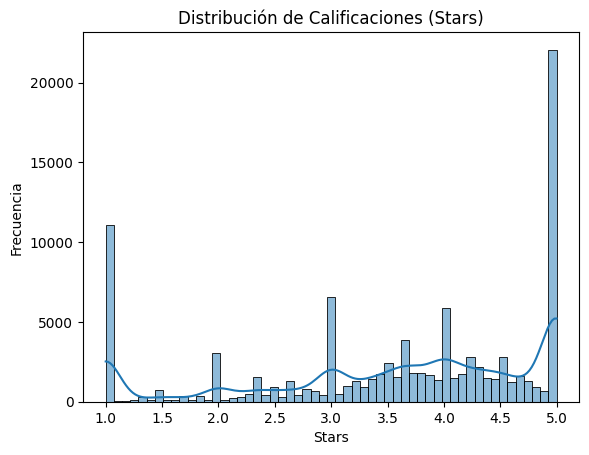

In [45]:

# Histograma para 'stars'
sns.histplot(users_sample['average_stars'], kde=True)
plt.xlabel("Stars")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones (Stars)")
plt.show()



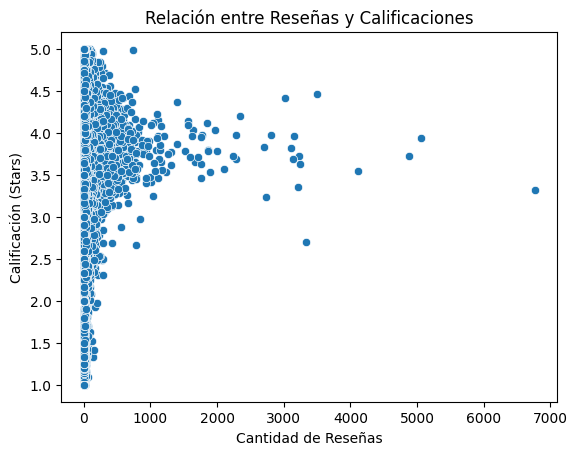

In [47]:
sns.scatterplot(x='review_count', y='average_stars', data=users_sample)
plt.xlabel("Cantidad de Reseñas")
plt.ylabel("Calificación (Stars)")
plt.title("Relación entre Reseñas y Calificaciones")
plt.show()



### **5. Preguntas Clave**
- **5.1. Columnas Importantes**: Identificaremos las columnas más relevantes para el análisis futuro.
- **5.2. Patrones y Tendencias**: Buscaremos patrones o tendencias útiles para el análisis posterior.
- **5.3. Correlaciones**: Exploraremos correlaciones entre columnas para identificar relaciones significativas.